# Project: NO-SHOW MEDICAL APPOINTMENT

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

● ‘ScheduledDay’ tells us on
what day the patient set up their
appointment.

● ‘Neighborhood’ indicates the
location of the hospital.

● ‘Scholarship’ indicates
whether or not the patient is
enrolled in Brasilian welfare
program Bolsa Família.

● Be careful about the encoding
of the last column: it says ‘No’ if
the patient showed up to their
appointment, and ‘Yes’ if they
did not show up.

This analysis will focus on whether or not patients show up for thier appointment or not and also determmine the factors that can influence a patient showing up or not showing up based on the data provided.

### Questions for Analysis
1. Does gender affect showing up or not showing up?
2. Does Age affect showing up or not showing up? 
3. Is there a relationship betwen diseases and showing up? 
5. Does the number of waiting days affect showing up or not showing up? 

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [161]:
df = pd.read_csv('C:/Users/HP/Downloads/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [162]:
df.shape

(110527, 14)

The dataset has 14 columns and 110527 rows

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


ScheduledDay and Appointment day are strings but should be in datetime format
No-show is also a string and will be converted to an integer to make calculations

In [164]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Fron the description, in the Age column, the oldest person is 115 years and the youngest is below 0 year(which shooul be an error). Also the aveerage age is 37years.
Not many people have diseases.
Not many people got the schorlaship. 
The sms that was sent out did not get to many people

In [165]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Handicap has 5 unique values but it is meant to be the same as others, 0 and 1
patientId is not same as appointmentID, this may mean that one patient has more than one appintment, it could be an error or some pateints records were not captured.

In [141]:
df.isnull().sum().any()

False

There are no null values in the dataset

In [110]:
df.duplicated().sum()

0

There are no duplicates in the dataset

### Data Cleaning 
1. Change ScheduledDay & AppointmentDay columns from strings to datetime.
2. Converting PatientID from float to integer so I can perform statistical analysis.
3. Rename the no-show colunm to no_show for better understanding.
4. Change the samples in the No-Show column from YES and NO to 1 and 0 for better statistical analysis
5. Drop patientID and AppointmentID because it is specifict to a patient and not relevant to my analysis
6. Drop records of any age less than 0
7. Clean the Handicap column to make it like other diseases between 0 and 1.

In [166]:
#Converting ScheduledDay and AppointmentDay from string to datetime
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [167]:
#converting patientID to integer
df['PatientId'] = df['PatientId'].astype(int)

In [168]:
#confirming if ScheduledDay and AppointmentDay have been changed to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  int32              
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

In [169]:
#renaming No-show to No_show
df.rename(columns={'No-show': 'No_show'}, inplace=True)

In [170]:
#Replacing No and Yes in the No_show column to 0 and 1 for statistical analysis
df.No_show.replace(('Yes', 'No'), (1, 0), inplace=True) ##Got this code from stackoverflow

In [171]:
#converting No_show from srting to integer
df['No_show'] = df['No_show'].astype(int)

In [172]:
#dropping the AppointmentID column beacuse it is not relevant to the analysis
df.drop(columns=['AppointmentID'] ,inplace=True)

,mean,std
No_show,,
0,37.790064,23.338878
1,34.317667,21.965941


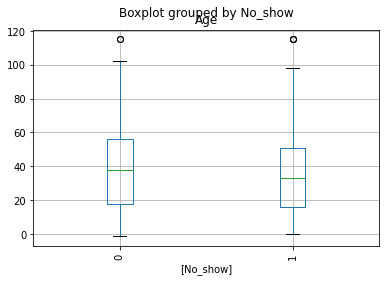

In [173]:
df.boxplot(column=['Age'], by = ['No_show'], rot=90)
pd.DataFrame(df.groupby(['No_show'])['Age'].describe().loc[:,['mean', 'std']])

Based on the above analysis, the average age of the patinet that show up is 34 years while the average of of the patients that did not show up is 37 years. They are both within the same age range.

From the box plot, the are two outliers in the age column -1 and 115. it will be dropped.

In [174]:
#dropping records of patients age that is less than 0 and above 100
df.query('Age<0')
df.query('Age==115')

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
63912,-2147483648,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,1
63915,-2147483648,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,1
68127,-2147483648,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,1
76284,-2147483648,F,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,0,0,0,0,1,0,0
97666,-2147483648,F,2016-05-19 07:57:56+00:00,2016-06-03 00:00:00+00:00,115,SÃO JOSÉ,0,1,0,0,0,1,0


In [175]:
#Dropping rows with age -1 and 115
df.drop(index = (df.loc[ df['Age'] < 0].index) , axis=0, inplace=True)
df.drop(index = (df.loc[ df['Age'] ==115].index) , axis=0, inplace=True)

In [176]:
#confirming that the age -1 and 115 has benn dropped.
df.query('Age<0')
df.query('Age==115')

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show


Gender
F    71834
M    38687
Name: PatientId, dtype: int64

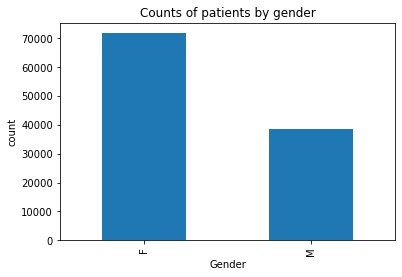

In [177]:
df.groupby(['Gender'])['PatientId'].count().plot(kind='bar').set_ylabel('count')
plt.title("Counts of patients by gender")

df.groupby(['Gender'])['PatientId'].count()

There are more female than male patients in the dataset

,Age
count,110521.000000
mean,37.085694
std,23.104606
min,0.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,102.000000


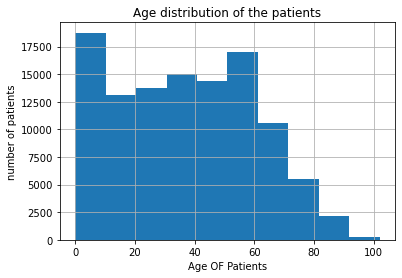

In [178]:
ag = df.Age.hist()
ag.set_ylabel('number of patients')
ag.set_xlabel('Age OF Patients')
ag.set_title('Age distribution of the patients')
pd.DataFrame(df['Age'].describe())

Looking at the distribution of the age of patients, we can see that it is skwed to the right, therefore we can say that there are less number of older patients.

In [179]:
df.groupby(['Gender'])['Age'].mean()

Gender
F    38.889245
M    33.736863
Name: Age, dtype: float64

The average age of the male pateints is 38.8 while that of thhe female patient is 33, this would mean that we have more older male patients than older female patients.

In [180]:
df.groupby(['Gender'])['Age'].max()

Gender
F    102
M    100
Name: Age, dtype: int64

The maximum age of both male and fmale patients are not far apart as seen above

In [181]:
df.groupby(['Gender'])['Age'].min()

Gender
F    0
M    0
Name: Age, dtype: int64

Both male and female patients have the smae minimum age.

In [183]:
df['Age_range'] = pd.cut(x=df['Age'], bins= [0, 20, 40, 60, 80, 110])
df['Age_range'].sample(5)

47133     (40, 60]
26298     (20, 40]
101829    (20, 40]
52510     (20, 40]
82258     (40, 60]
Name: Age_range, dtype: category
Categories (5, interval[int64, right]): [(0, 20] < (20, 40] < (40, 60] < (60, 80] < (80, 110]]

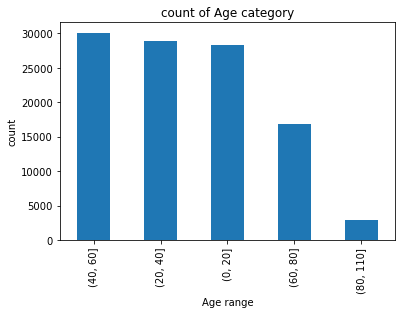

In [184]:
Age_category = df['Age_range'].value_counts()
Age_category.plot(kind = 'bar').set_ylabel('count')
plt.title("count of Age category")
plt.xlabel("Age range");


From the above it can be seen that there are more patients between the ages of 0 and 60, while those between the ages of 80 and above are few.

In [188]:
def Bar_plot(arg1, arg2):
    df.groupby([arg1])['No_show'].value_counts().unstack().plot(kind='bar').set_ylabel('count')
    plt.title(arg2)
    plt.legend(['show', 'no_show'])


Scholarship  No_show
0            0          79922
             1          19738
1            0           8283
             1           2578
Name: No_show, dtype: int64

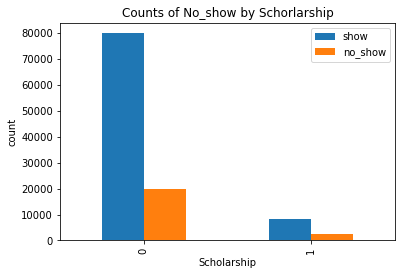

In [196]:
Bar_plot('Scholarship', 'Counts of No_show by Schorlarship')
df.groupby(['Scholarship'])['No_show'].value_counts()

Most patients did not recieve schorlaship but some still showed up, while some of those that received svhorlaship still mossed thier appointment.

SMS_received  No_show
0             0          62508
              1          12532
1             0          25697
              1           9784
Name: No_show, dtype: int64

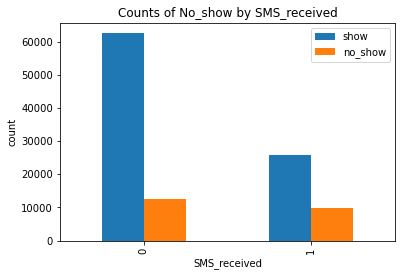

In [190]:
Bar_plot('SMS_received', 'Counts of No_show by SMS_received')
df.groupby(['SMS_received'])['No_show'].value_counts()

SMs recieved does not have effect on patiennts showing up becauase we can see from the above visual that more pateints who did not recieve SMS shoed up fo thier appointment, while  a number of those who received sms still missed thier appointment.

In [192]:
#Treating the Handicap column
#making all values 1 and above in the Handicap column to be 1
df.loc[df['Handcap'] > 1, 'Handcap'] = 1

In [193]:
#confirming that the Handicap column has been changed to 0 and 1
df['Handcap'].unique()

array([0, 1], dtype=int64)

Handcap  No_show
0        0          86372
         1          21912
1        0           1833
         1            404
Name: No_show, dtype: int64

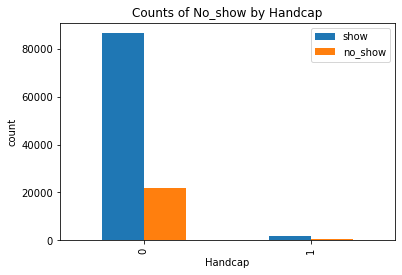

In [194]:
Bar_plot('Handcap', 'Counts of No_show by Handcap')
df.groupby(['Handcap'])['No_show'].value_counts()

Handicap does not have effect on patients showing up or not.

<a id='eda'></a>
## Exploratory Data Analysis

### 1. Does the number of waiting days affect a pattient showing up or not? the question is relevant in the analysis because if the numbr of wait days affects the patients not showing up fir the appointment, then a solution will be to either decrease or increase the number of wait days to suit the patients schedule.

In [65]:
#Firstly, what is the count of those who showed up and those who did not
No_show_counts = df['No_show'].value_counts()
No_show_counts

0    88205
1    22316
Name: No_show, dtype: int64

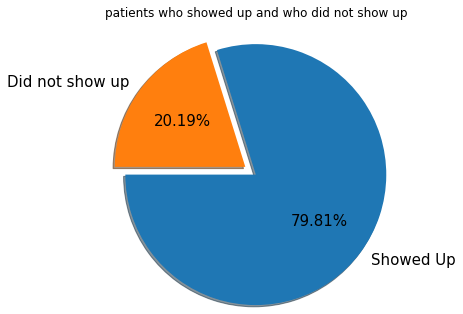

In [66]:
#This code was gotten from kaggle
label_Names = ['Showed Up', 'Did not show up']
data = [df.loc[(df['No_show'] == 0)].count()[0], df.loc[(df['No_show'] == 1)].count()[0]]
explode = (0, 0.15)
plt.axis('equal'); 
plt.pie(data,radius=1.5,shadow=True ,labels = label_Names,explode=explode, startangle=180,autopct='%0.2f%%',textprops = {"fontsize":15})
plt.title('patients who showed up and who did not show up', y=1.2);

From the above analysis and visualization, we can see that almost 80% showed up
for thier appintment while about 20% did not show up

In [67]:
#Calculating the number of days between SheduledDay and Appointmentday using date alone
df['Scheduled_date'] = df['ScheduledDay'].dt.date
df['Appointment_date'] = df['AppointmentDay'].dt.date
df['Wait_Days'] = (df['Appointment_date']-df['Scheduled_date']).dt.days

In [68]:
df['Wait_Days'].describe()

count    110521.000000
mean         10.183721
std          15.255082
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Wait_Days, dtype: float64

from the above, the minimum number of wait_Days is negative which means that the AppintmentDay was before the SchheduleDay, and thia is wrong, I will take out that wrong entry.

In [69]:
df.query('Wait_Days<0')

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Age_range,Scheduled_date,Appointment_date,Wait_Days
27033,1,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,1,"(20, 40]",2016-05-10,2016-05-09,-1
55226,1,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,1,"(0, 20]",2016-05-18,2016-05-17,-1
64175,1,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,1,"(20, 40]",2016-05-05,2016-05-04,-1
71533,1,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,1,"(80, 110]",2016-05-11,2016-05-05,-6
72362,1,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,1,"(0, 20]",2016-05-04,2016-05-03,-1


In [70]:
#dropping all waitdays below 0
df.drop(index = (df.loc[ df['Wait_Days'] < 0].index) , axis=0, inplace=True)

In [71]:
df['Wait_Days'].describe()

count    110516.000000
mean         10.184272
std          15.255201
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Wait_Days, dtype: float64

There is no more negative minimum value, meaning all Appointment days are either on or after the ScheduleDay

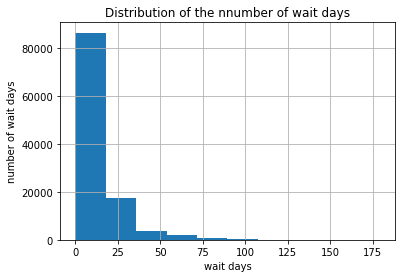

In [73]:
wd = df['Wait_Days'].hist()
wd.set_ylabel('number of wait days')
wd.set_xlabel('wait days')
wd.set_title('Distribution of the nnumber of wait days');

The distribution shows that it is skewed to the right. Most ScheduleDay are on the same day as Appointment day as seen from the visual above

In [74]:
# putting the waitdays in a range
bins=[-0.01 , 0.9, 7, 14, 30, 200]
bins_labels=['Same Day' , 'Less than a Week','Less than 2 Weeks','Less than a Month', 'Greater than a Month']

df['wait_level']=pd.cut(df['Wait_Days'],bins,labels=bins_labels)

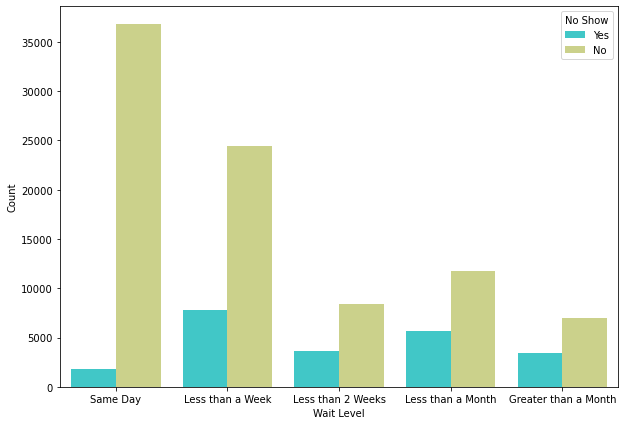

In [75]:
#using visuals to show relatioship between waitdays and show or no show
fig, (ax1) = plt.subplots(ncols=1, sharey=True)
hue_order=[1,0]

sns.countplot(x='wait_level', data=df, hue='No_show', palette='rainbow', hue_order=hue_order)
fig.set_figwidth(10)
fig.set_figheight(7)
ax1.set(xlabel = 'Wait Level', ylabel= 'Count')

plt.legend(loc='upper right', title='No Show',labels=['Yes', 'No']);
#code was gotten from Kaggle.

Fron the avove visual, If a patient gets an appointment on the same day it is scheduled, the patient shows up but the higher the number of wait days the lower the number of patients that show up.So it is better to have patients get thier appointment days the same day as the scheduled day

### 2. Is there a relationship between gender and patients showin up for thier appointment

In [76]:
#First, I will group the gender to see how many male or female patients are there
gender_counts = df['Gender'].value_counts()
gender_counts

F    71831
M    38685
Name: Gender, dtype: int64

We have already established the fact that there are more female than male patients.

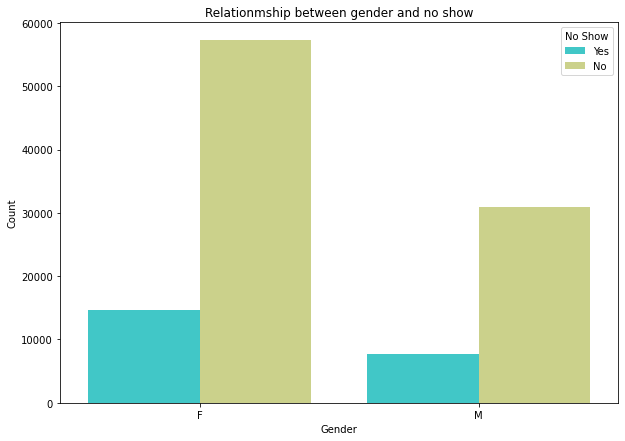

In [77]:
#Relationship between gender and patients showing up or not showing up
fig, (ax1) = plt.subplots(ncols=1, sharey=True)
hue_order=[1,0]

sns.countplot(x='Gender', data=df, hue='No_show', palette='rainbow', hue_order=hue_order)
fig.set_figwidth(10)
fig.set_figheight(7)
ax1.set(xlabel = 'Gender', ylabel='Count', title='Relationmship between gender and no show')
#place legend in upper left of plot
plt.legend(loc='upper right', title='No Show',labels=['Yes', 'No']);
#code was gotten from Kaggle.

From the above, it is clear that gender does not really have effect on patients showwing up or not showing up.

### 3. Does the average age have effect on patients showing up or not

In [177]:
df.describe()['Age']

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

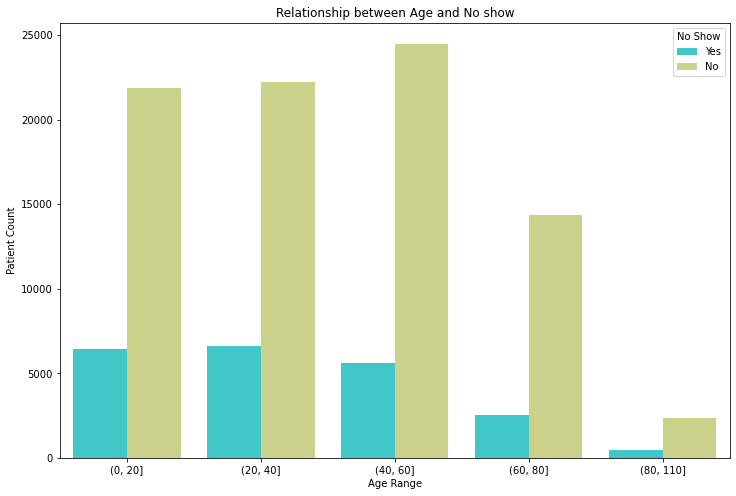

In [81]:
fig, (ax1) = plt.subplots(ncols=1, sharey=True)
hue_order=[1,0]

sns.countplot(x='Age_range', data=df, hue='No_show', palette='rainbow', hue_order=hue_order)
fig.set_figwidth(12)
fig.set_figheight(8)
ax1.set(xlabel='Age Range', ylabel='Patient Count', title='Relationship between Age and No show')

plt.legend(loc='upper right', title='No Show',labels=['Yes', 'No']);

From the above we can see that the patients that did not show up for thier appointments are those between the ages of 0 and 60. The old adults tend to show up more for thier appoointment. further analysis will be done to determine if diseases is the reason why the older patients show up more or not.

Hipertension  Age_range
0             (0, 20]      28258
              (20, 40]     27088
              (40, 60]     21076
              (60, 80]      7708
              (80, 110]     1047
1             (60, 80]      9202
              (40, 60]      9005
              (80, 110]     1799
              (20, 40]      1745
              (0, 20]         49
dtype: int64

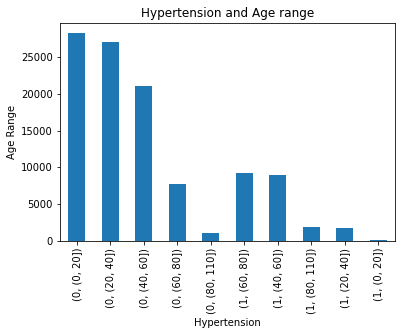

In [87]:
df.groupby(['Hipertension'])[['Age_range']].value_counts().plot(kind='bar').set_ylabel('Age Range')
plt.title("Hypertension and Age range")
plt.xlabel("Hypertension");
df.groupby(['Hipertension'])[['Age_range']].value_counts()

It can be seen from the above that patients betwen the ages of 80-110 have hypertention more than other age range.

Diabetes  Age_range
0         (20, 40]     28326
          (0, 20]      28246
          (40, 60]     27093
          (60, 80]     13109
          (80, 110]     2260
1         (60, 80]      3801
          (40, 60]      2988
          (80, 110]      586
          (20, 40]       507
          (0, 20]         61
dtype: int64

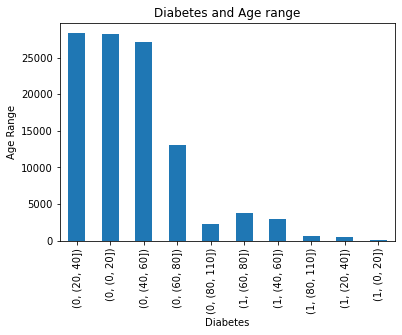

In [91]:
df.groupby(['Diabetes'])[['Age_range']].value_counts().plot(kind='bar').set_ylabel('Age Range')
plt.title("Diabetes and Age range")
plt.xlabel("Diabetes");
df.groupby(['Diabetes'])[['Age_range']].value_counts()

It can seen that age category 40-60 has diabetes more than the others

Alcoholism  Age_range
0           (0, 20]      28272
            (40, 60]     28221
            (20, 40]     28103
            (60, 80]     16196
            (80, 110]     2825
1           (40, 60]      1860
            (20, 40]       730
            (60, 80]       714
            (0, 20]         35
            (80, 110]       21
dtype: int64

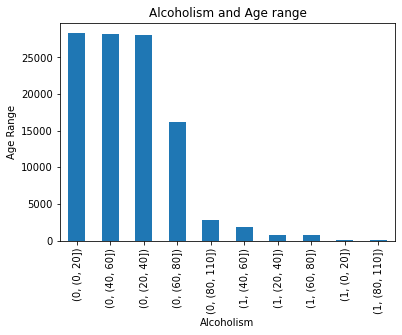

In [90]:
df.groupby(['Alcoholism'])[['Age_range']].value_counts().plot(kind='bar').set_ylabel('Age Range')
plt.title("Alcoholism and Age range")
plt.xlabel("Alcoholism");
df.groupby(['Alcoholism'])[['Age_range']].value_counts()

Patients between the ages of 40 to 60 take more alcohol than others.

### 4. Does diseases(hypertension and diabetes) have effect on patients not showing up?

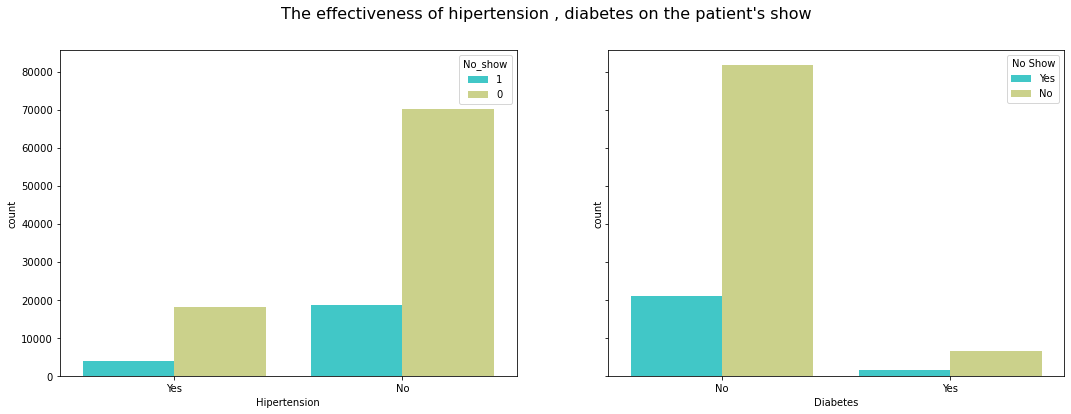

In [92]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
hue_order=[1,0]

hipertension_maping=df['Hipertension'].map({1:'Yes',0: 'No'})
diabetes_maping=df['Diabetes'].map({1:'Yes',0: 'No'})


sns.countplot(x=hipertension_maping, data=df, hue= 'No_show', ax=ax1, palette='rainbow', hue_order=hue_order)
sns.countplot(x=diabetes_maping, data=df, hue= 'No_show', ax=ax2, palette='rainbow', hue_order=hue_order)

fig.set_figwidth(18)
fig.set_figheight(6)
fig.suptitle("The effectiveness of hipertension , diabetes on the patient's show", fontsize=16)
plt.legend(loc='upper right', title='No Show',labels=['Yes', 'No']);

From the above we cnn see that diseses does not have a strong effect on patients not showing up but herpertension has more effect on patient showing or not showing up compared to diabetes

<a id='conclusions'></a>
## Conclusions
1. The percentage of patients that show up is 79.81% whilw the percentage of patient that did not show up is 20.19%
2. the number of waiting days, that is the number of days betwen the schedule day and appointment day affects patients showing up, because it canm be seen that as the number of wait days increass, patients tend to not show up for thier appointments.
3. Gender did not have edffect on pateint showing up or not, it can be seen that both male and female have the same response to showing up or not showing up
4. The young adults and ,iddle aged adults, that is patients between the ages of 25 and 75 tend to not show up for thir sppointments as compared to children and old adults.
5. Diseases does not have a strong effect on patients showing up but it is clear that patients with hypertension miss thier appointment more than patients with diabetes.
## Limitations
1. The appointmentId in the dataset is greater than patientId, which may mean that some patients booked 2 or more appointments or it may be an error.
2. the age column had a sample where the age was below zero and above 110, this was dropped before analysis continued
3. There were some dates were the appointment day was before the schedule date, this was also dropped.